# IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA

In [4]:
airline=pd.read_excel('Airlines+Data.xlsx')

In [5]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# UNDERSTANDING DATA

In [6]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
airline.shape

(96, 2)

In [9]:
airline.columns

Index(['Month', 'Passengers'], dtype='object')

In [13]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

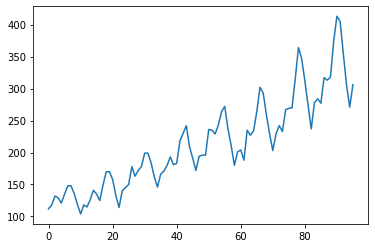

In [15]:
airline.Passengers.plot()

In [16]:
import seaborn as sns

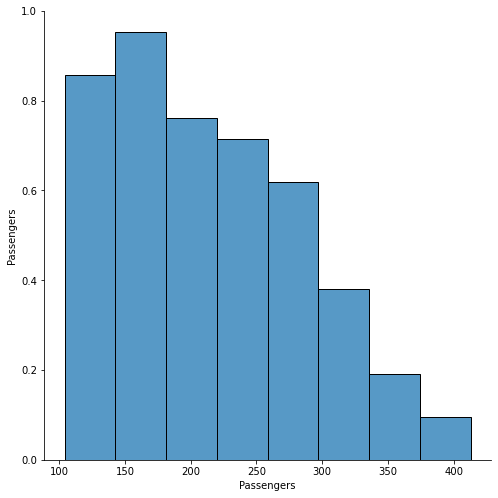

In [17]:
sns.pairplot(airline,height=7)

# Univariate Analysis

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

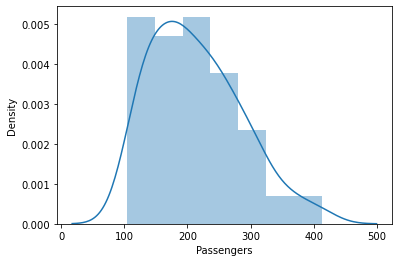

In [18]:
sns.distplot(airline['Passengers'],bins=7)

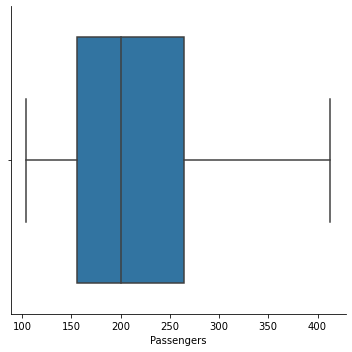

In [21]:
sns.catplot(x= 'Passengers',kind ='box', data=airline)

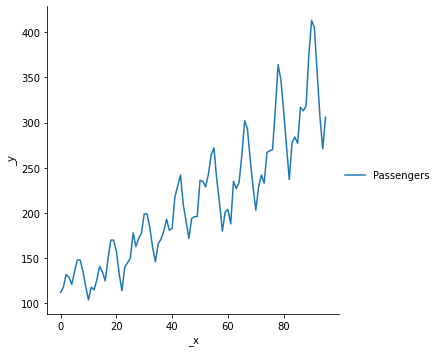

In [22]:
sns.relplot(data=airline, kind="line")

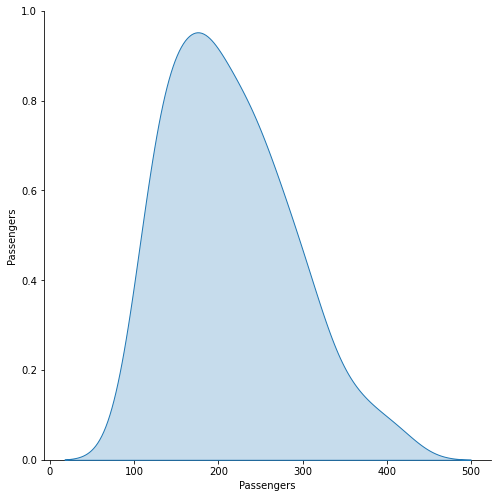

In [23]:
g = sns.pairplot(airline, diag_kind="kde", height = 7)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [24]:
airline["month"] =airline.Month.dt.strftime("%b") 
airline["year"] = airline.Month.dt.strftime("%Y") 
airline.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [25]:
heatmap_year_month = pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_year_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

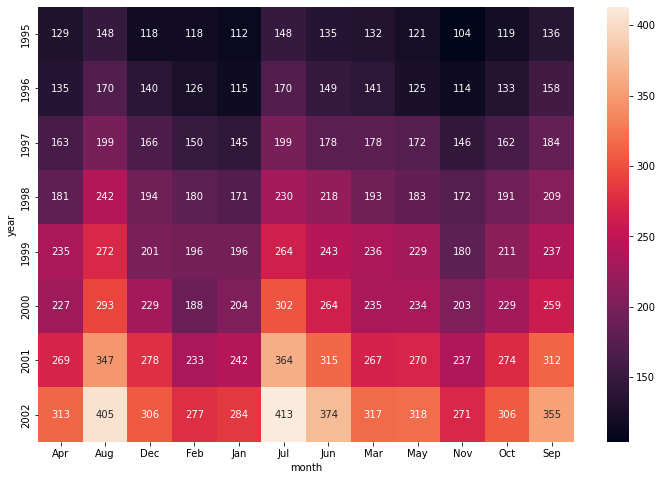

In [26]:
plt.figure(figsize=(12,8))
heatmap_year_month = pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

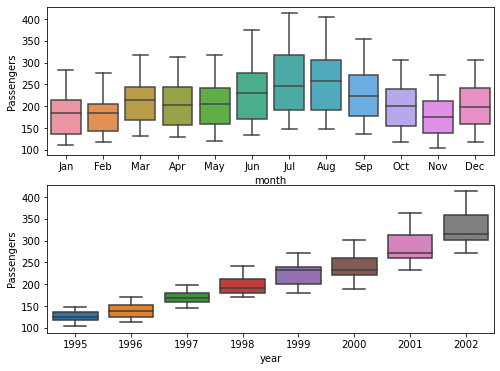

In [27]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

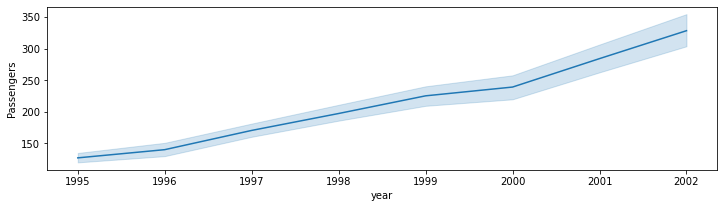

In [28]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airline)

In [30]:
airline.head(10)

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [31]:
import datetime
airline['m'] = range(1,(airline.shape[0]+1))
airline['m_square'] = np.power(airline['m'],2)
airline['log_Passengers']=np.log(airline['Passengers'])
airline.head()

,Month,Passengers,month,year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [32]:
ddf = pd.get_dummies(airline.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
fdf = pd.concat([airline,ddf],axis=1)
fdf.head()

,Month,Passengers,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(fdf,columns=col)
df1.tail()

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91,2002-08-01,405,Aug,92,8464,2002,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,93,8649,2002,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,94,8836,2002,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,95,9025,2002,5.602119,0,0,0,0,0,0,0,0,0,0,1,0
95,2002-12-01,306,Dec,96,9216,2002,5.723585,0,0,0,0,0,0,0,0,0,0,0,1


# SPLITTING DATA

In [36]:
Train = df1.head(86)
Test = df1.tail(10)

# LINEAR MODEL

In [38]:
import statsmodels.formula.api as smf

In [39]:
linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.6431497277825

# EXPONENTIAL MODEL

In [40]:
Exp = smf.ols('log_Passengers~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.903123347893114

# QUADRATIC MODEL

In [42]:
Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.9143635785296

# ADDITIVE MODEL

In [43]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.79010436819317

## ADDITVE SEASONALITY QUADRATIC MODEL

In [44]:
add_sea_Quad = smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m','m_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899228875

# MULTIPLICATIVE SEASONALITY

In [45]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.3849354946137

# Multiplicative Additive Seasonality

In [46]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.264958330316253

# Compare the results

In [47]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935


# <u>================================================================